In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# downloading training dataset
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F9790125A60>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label :  5


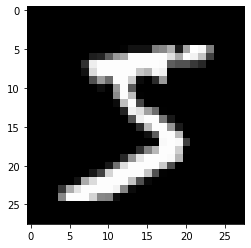

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label : ', label)

Label :  3


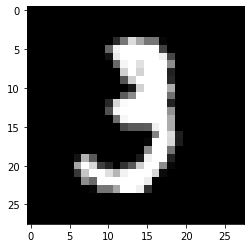

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label : ', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
               train = True,
               transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


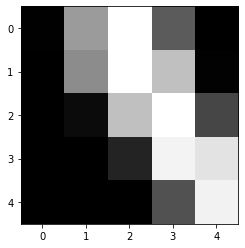

In [13]:
# plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

# Training and validation dataset

In [14]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

# Creating dataloaders

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [19]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# l
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0191,  0.0123,  0.0174,  ...,  0.0278,  0.0242, -0.0216],
        [ 0.0168, -0.0342, -0.0199,  ..., -0.0319,  0.0209,  0.0287],
        [ 0.0224,  0.0286, -0.0075,  ..., -0.0227,  0.0348,  0.0020],
        ...,
        [ 0.0217, -0.0329,  0.0080,  ..., -0.0331,  0.0214, -0.0302],
        [ 0.0316,  0.0105, -0.0259,  ...,  0.0297, -0.0117, -0.0003],
        [ 0.0118, -0.0241,  0.0029,  ..., -0.0252, -0.0283,  0.0220]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0314,  0.0043, -0.0089,  0.0180,  0.0049, -0.0182, -0.0302,  0.0064,
         0.0034,  0.0330], requires_grad=True)

In [22]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([4, 7, 1, 0, 3, 2, 2, 9, 1, 7, 6, 0, 3, 4, 7, 5, 2, 2, 7, 9, 6, 0, 6, 6,
        6, 5, 0, 7, 5, 8, 7, 4, 5, 3, 6, 7, 5, 1, 1, 8, 3, 1, 9, 4, 1, 0, 6, 2,
        0, 2, 3, 2, 4, 7, 4, 7, 9, 9, 0, 3, 1, 9, 9, 6, 7, 2, 5, 5, 1, 8, 4, 1,
        2, 8, 4, 7, 3, 7, 7, 2, 2, 0, 4, 5, 2, 5, 4, 1, 8, 2, 3, 1, 5, 9, 1, 1,
        5, 9, 3, 5, 1, 7, 1, 3, 9, 0, 1, 5, 3, 7, 8, 8, 4, 8, 3, 1, 7, 2, 1, 7,
        1, 9, 0, 4, 7, 4, 0, 5])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

- we get an error in the above as nn.Linear expects a 2d tensor for images

In [28]:
images.shape

torch.Size([128, 1, 28, 28])

In [29]:
images.reshape(128,-1).shape
# reshape is very efficient as it does not create a copy 

torch.Size([128, 784])

# Introduction to classes

In [23]:
class Person:
    # class constructor
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    # method
    def say_hello(self):
        print("My name is " + self.name + "!")

In [24]:
bob = Person('Bob', 32)

In [25]:
bob.say_hello()

My name is Bob!


In [26]:
bob.name, bob.age

('Bob', 32)

# Creating our own custom model/class

In [36]:
class Mnistmodel(nn.Module):
    def __init__(self):
        super().__init__() # we need to write this line when we are extending another class
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = Mnistmodel()
    

In [37]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [38]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0100, -0.0186,  0.0148,  ...,  0.0350,  0.0038, -0.0015],
         [-0.0168,  0.0240, -0.0277,  ...,  0.0078,  0.0258,  0.0243],
         [-0.0237, -0.0281, -0.0271,  ..., -0.0088, -0.0340, -0.0130],
         ...,
         [-0.0162,  0.0275,  0.0081,  ..., -0.0088, -0.0219, -0.0193],
         [-0.0266, -0.0316, -0.0149,  ...,  0.0144, -0.0328, -0.0207],
         [-0.0136,  0.0131,  0.0223,  ...,  0.0020, -0.0232,  0.0133]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0294, -0.0352,  0.0081,  0.0185, -0.0307, -0.0211,  0.0116, -0.0037,
          0.0196,  0.0051], requires_grad=True)]

In [39]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('outputs.shape : ', outputs.shape)
print('sample output : \n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
sample output : 
 tensor([[ 0.1007, -0.0366,  0.0896, -0.2303,  0.0830,  0.2382,  0.1843,  0.1146,
         -0.0858,  0.0306],
        [ 0.0173,  0.1931,  0.0513, -0.0397, -0.1102,  0.1225, -0.1708,  0.1144,
         -0.1028,  0.3211]])


# Softmax
- from the above output, we can see two problems
    1. probabilities can't be negative
    2. the sum of all the probablilities should be 1
- to fix this issue we use the softmax function
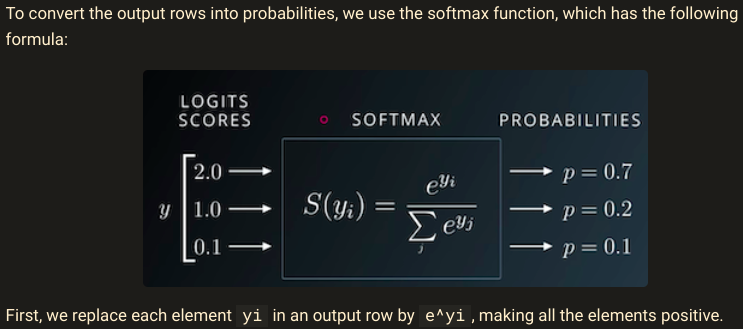

In [40]:
import torch.nn.functional as F

In [41]:
probs = F.softmax(outputs, dim = 1)

# look at the sample probabilities 
print('sample probabilities:\n', probs[:2].data)

# add up the probabilities of an output row
print('Sum: ', torch.sum(probs[0]).item())

sample probabilities:
 tensor([[0.1045, 0.0911, 0.1033, 0.0750, 0.1026, 0.1199, 0.1136, 0.1059, 0.0867,
         0.0974],
        [0.0968, 0.1154, 0.1001, 0.0914, 0.0852, 0.1075, 0.0802, 0.1066, 0.0858,
         0.1311]])
Sum:  1.0


In [42]:
# extracting the max probability and the index where it occurs
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 9, 1, 3, 9, 1, 1, 2, 9, 1, 2, 2, 9, 3, 1, 5, 3, 2, 3, 2, 0, 7, 3, 1,
        0, 2, 2, 9, 2, 1, 5, 2, 9, 1, 9, 9, 1, 9, 7, 7, 1, 2, 9, 2, 9, 1, 9, 2,
        1, 9, 4, 3, 3, 9, 6, 9, 9, 0, 3, 1, 2, 1, 3, 5, 2, 9, 1, 1, 2, 2, 3, 2,
        9, 6, 9, 9, 2, 1, 9, 9, 2, 9, 4, 9, 3, 3, 3, 7, 1, 9, 9, 9, 2, 3, 3, 3,
        2, 7, 1, 9, 9, 9, 1, 2, 1, 2, 2, 3, 3, 9, 2, 9, 1, 2, 2, 8, 3, 9, 1, 5,
        9, 2, 7, 9, 6, 0, 9, 9])
tensor([0.1199, 0.1311, 0.1171, 0.1281, 0.1369, 0.1222, 0.1405, 0.1439, 0.1342,
        0.1274, 0.1390, 0.1404, 0.1471, 0.1202, 0.1185, 0.1241, 0.1316, 0.1347,
        0.1196, 0.1243, 0.1165, 0.1256, 0.1302, 0.1278, 0.1162, 0.1343, 0.1280,
        0.1220, 0.1481, 0.1337, 0.1239, 0.1245, 0.1244, 0.1274, 0.1180, 0.1300,
        0.1273, 0.1256, 0.1380, 0.1184, 0.1176, 0.1193, 0.1366, 0.1169, 0.1237,
        0.1327, 0.1137, 0.1392, 0.1344, 0.1366, 0.1300, 0.1212, 0.1118, 0.1212,
        0.1237, 0.1166, 0.1294, 0.1326, 0.1142, 0.1165, 0.1389, 0.1280, 0.1197,
       

In [43]:
labels

tensor([2, 3, 6, 1, 8, 1, 7, 3, 1, 7, 4, 9, 9, 2, 7, 8, 2, 9, 7, 8, 1, 7, 5, 2,
        1, 3, 7, 4, 9, 8, 6, 8, 4, 1, 3, 8, 3, 5, 5, 5, 1, 3, 8, 3, 3, 7, 3, 9,
        8, 3, 0, 1, 1, 3, 2, 4, 6, 2, 1, 2, 9, 7, 0, 6, 8, 3, 7, 4, 8, 9, 4, 9,
        3, 4, 1, 9, 9, 4, 7, 9, 7, 6, 0, 9, 1, 2, 8, 7, 7, 9, 1, 6, 5, 5, 5, 0,
        7, 5, 2, 4, 0, 3, 9, 4, 2, 4, 9, 9, 0, 4, 9, 3, 2, 5, 4, 5, 4, 6, 1, 2,
        6, 0, 7, 4, 7, 0, 5, 7])

In [44]:
def accuracy(outputs, labels):
    , preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [49]:
accuracy(outputs,labels)

tensor(0.1016)